In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

repair_data = pd.read_csv('../repairs.csv')
cache_data = pd.read_csv('../cache.csv')

In [76]:
repair_data.describe()

,Unnamed: 0,steps,time,calls,iic,inf_mcs,inf_weakening
count,3132.000000,2200.000000,2200.000000,2200.000000,2199.000000,2199.000000,2199.000000
mean,1565.500000,2.505909,6691.431818,6875.086818,0.519567,2736.469304,2776.176899
std,904.274848,6.336477,22412.799799,8437.433987,0.366800,3175.967175,3290.150268
min,0.000000,1.000000,605.000000,548.000000,0.000000,120.000000,118.000000
25%,782.750000,1.000000,1425.750000,2147.500000,0.134314,457.000000,421.500000
50%,1565.500000,1.000000,2116.000000,3987.000000,0.500000,875.000000,876.000000
75%,2348.250000,2.000000,3795.250000,8315.250000,0.903711,5322.000000,5509.500000
max,3131.000000,143.000000,282936.000000,112949.000000,1.000000,13386.000000,13822.000000


In [77]:
cache_data.describe()

,Unnamed: 0,size,time,calls
count,19459.00000,19459.000000,19459.000000,19459.000000
mean,9729.00000,22.374223,166.049914,7270.691007
std,5617.47378,30.500595,311.374892,11843.182841
min,0.00000,1.000000,0.000000,0.000000
25%,4864.50000,5.000000,18.500000,662.300000
50%,9729.00000,10.000000,49.000000,2193.000000
75%,14593.50000,20.000000,160.000000,7227.380000
max,19458.00000,100.000000,6542.000000,84194.000000


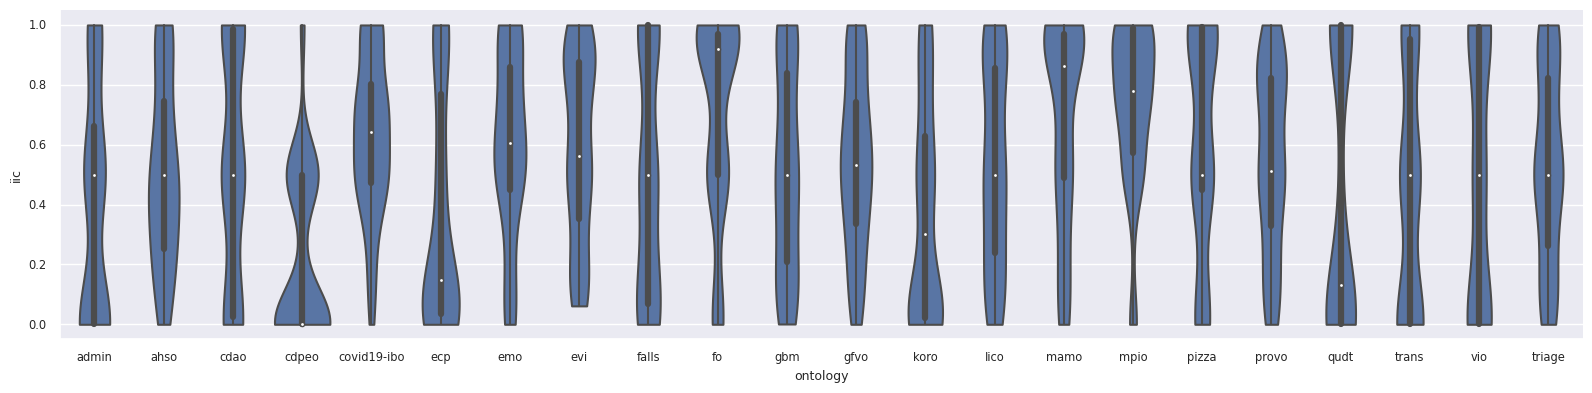

In [86]:
sns.set(font_scale=0.75)
sns.catplot(data=repair_data, kind='violin', x='ontology', y='iic', height=4, aspect=4, cut=0, color='b')
plt.savefig('../../figures/iic-ontology-violin.png')

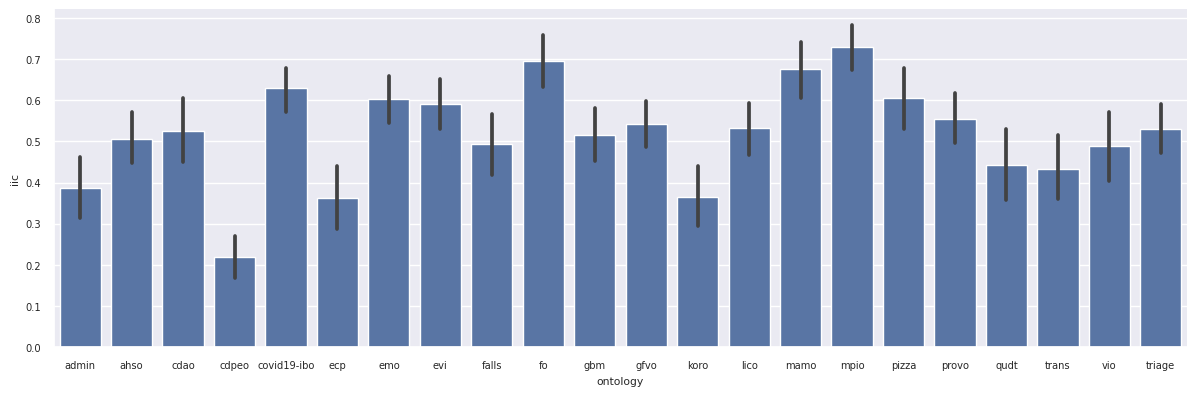

In [87]:
sns.set(font_scale=0.65)
sns.catplot(data=repair_data, kind='bar', x='ontology', y='iic', height=4, aspect=3, color='b')
plt.savefig('../../figures/iic-ontology-bar.png')

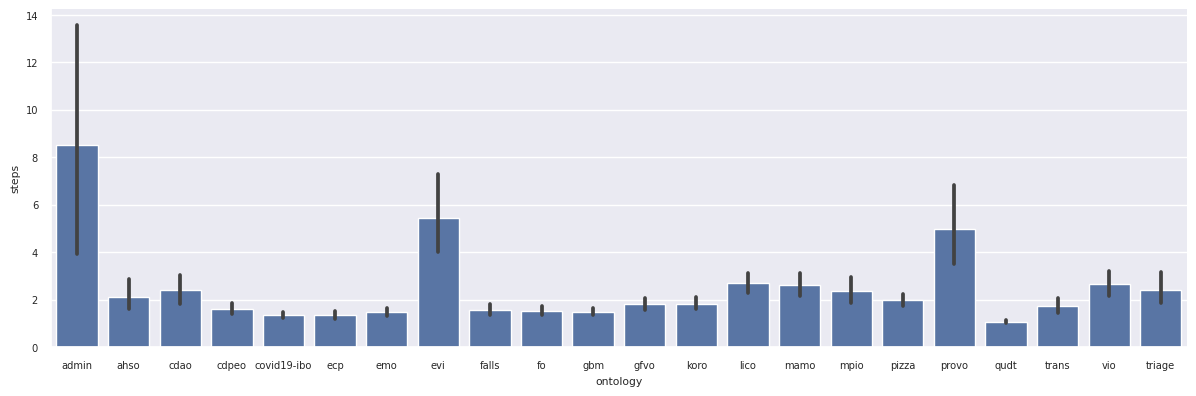

In [88]:
sns.set(font_scale=0.65)
sns.catplot(data=repair_data, kind='bar', x='ontology', y='steps', height=4, aspect=3, color='b')
plt.savefig('../../figures/steps-ontology-bar.png')

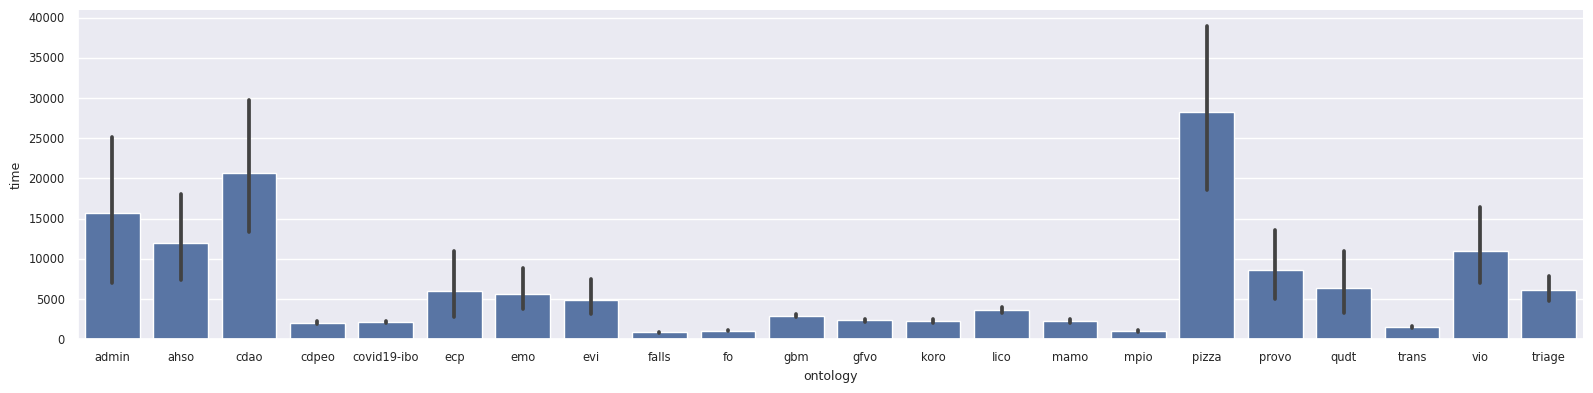

In [89]:
sns.set(font_scale=0.75)
sns.catplot(data=repair_data, kind='bar', x='ontology', y='time', height=4, aspect=4, color='b')
plt.savefig('../../figures/time-ontology-bar.png')

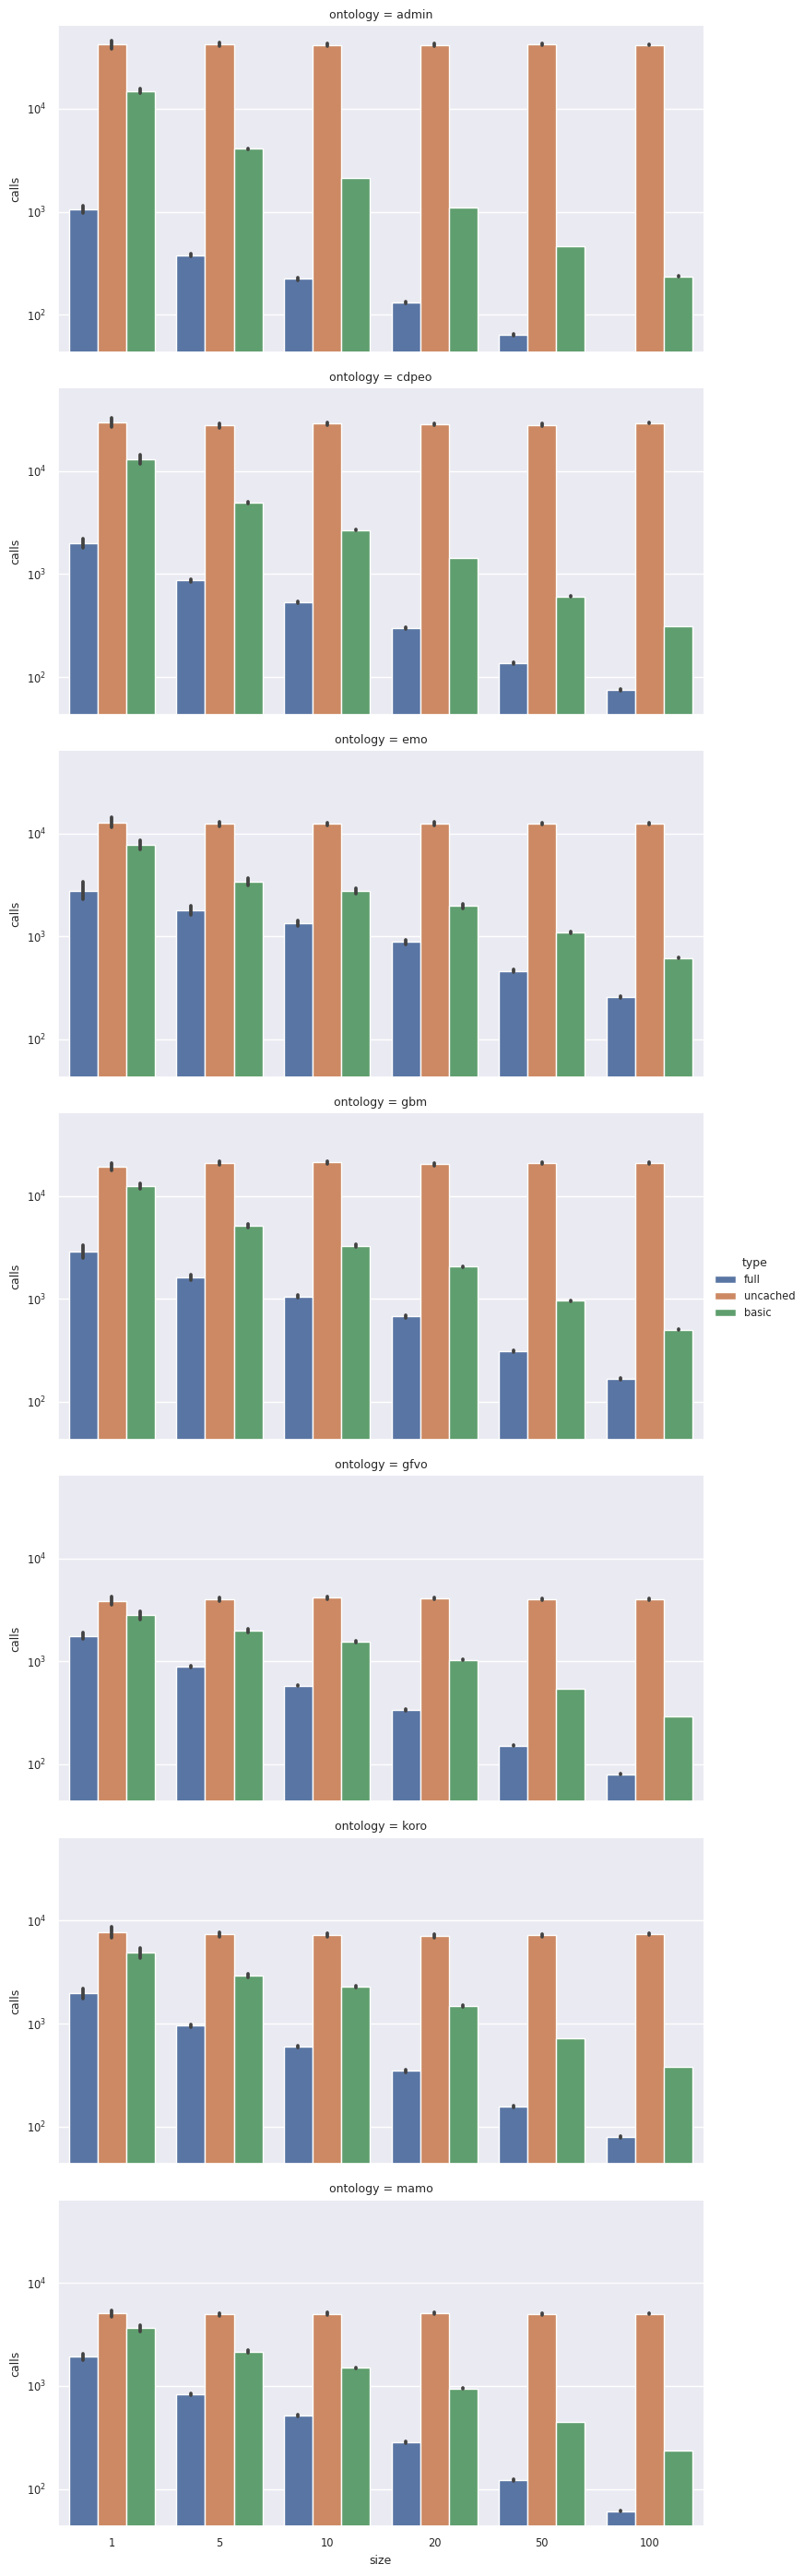

In [90]:
sns.set(font_scale=0.75)
sns.catplot(data=cache_data, kind='bar', x='size', y='calls', hue='type', row='ontology', height=4, aspect=2)
plt.yscale('log')
plt.savefig('../../figures/calls-cache-ontology-bar.png')

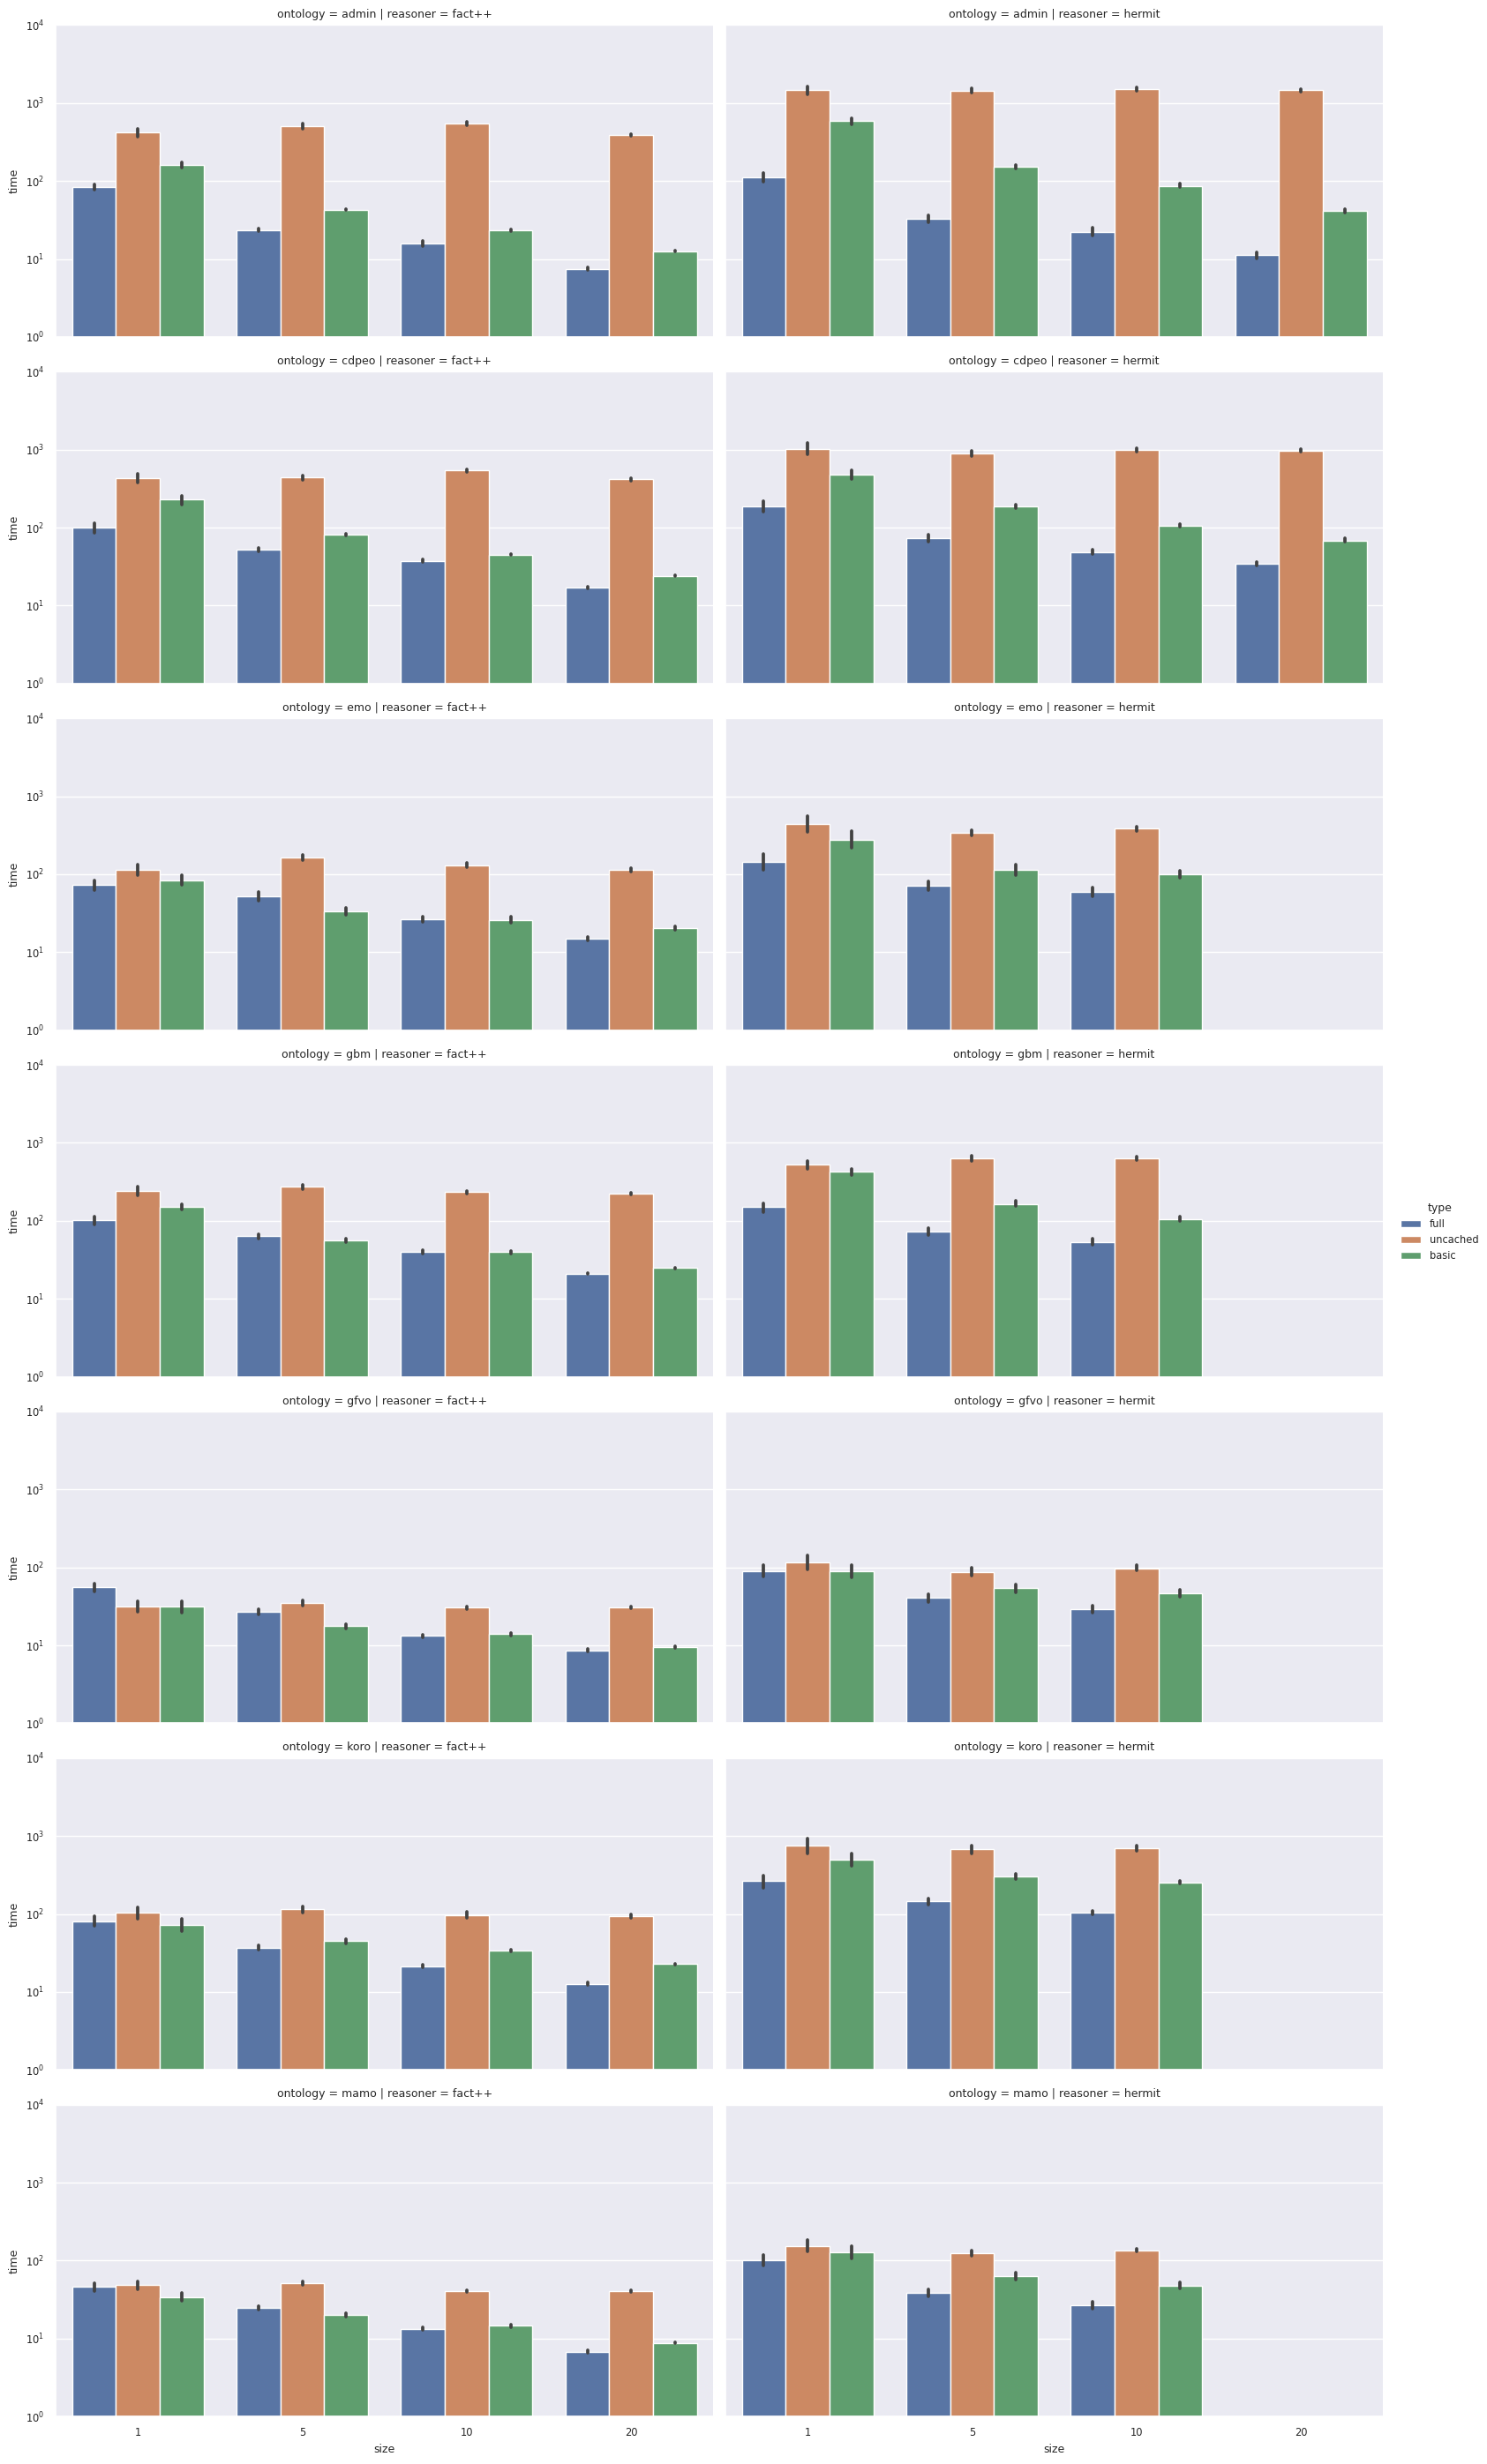

In [91]:
sns.set(font_scale=0.75)
sns.catplot(data=cache_data[cache_data['size'] <= 20], kind='bar', x='size', y='time', hue='type', row='ontology', col='reasoner', height=4, aspect=2)
plt.yscale('log')
plt.ylim((1, 10**4))
plt.savefig('../../figures/time-cache-ontology-reasoner-bar.png')

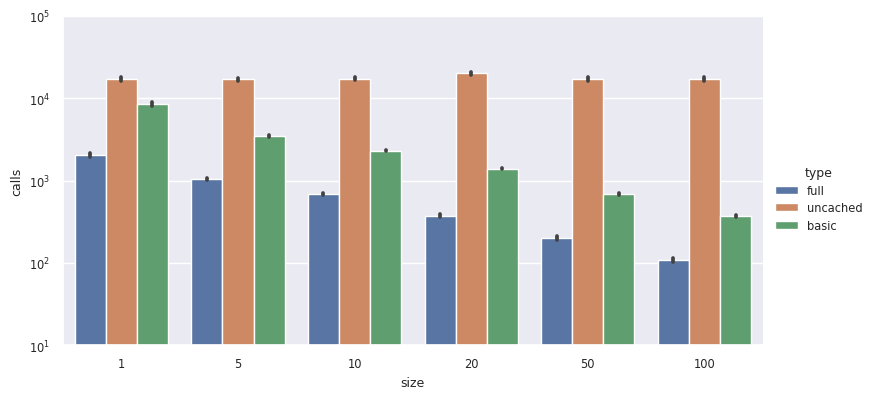

In [96]:
sns.set(font_scale=0.75)
sns.catplot(data=cache_data, kind='bar', x='size', y='calls', hue='type', height=4, aspect=2)
plt.yscale('log')
plt.ylim((10, 10**5))
plt.savefig('../../figures/calls-cache-bar.png')

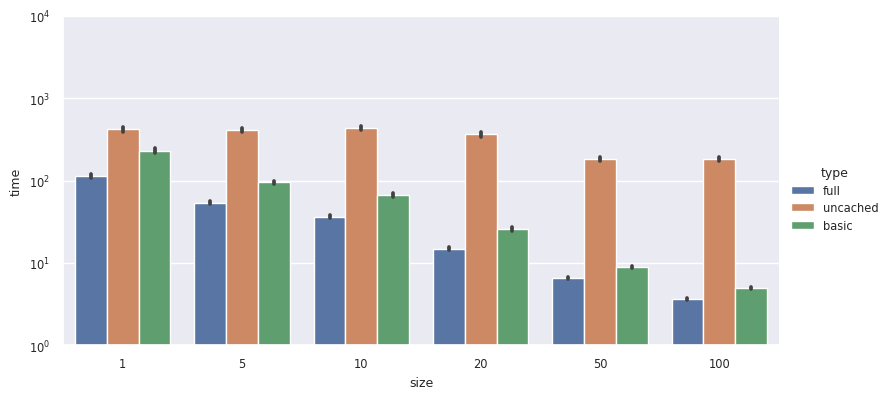

In [97]:
sns.set(font_scale=0.75)
sns.catplot(data=cache_data, kind='bar', x='size', y='time', hue='type', height=4, aspect=2)
plt.yscale('log')
plt.ylim((1, 10**4))
plt.savefig('../../figures/time-cache-bar.png')